In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

In [2]:
data = pd.read_csv('Telecom_Customer_Details.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: >

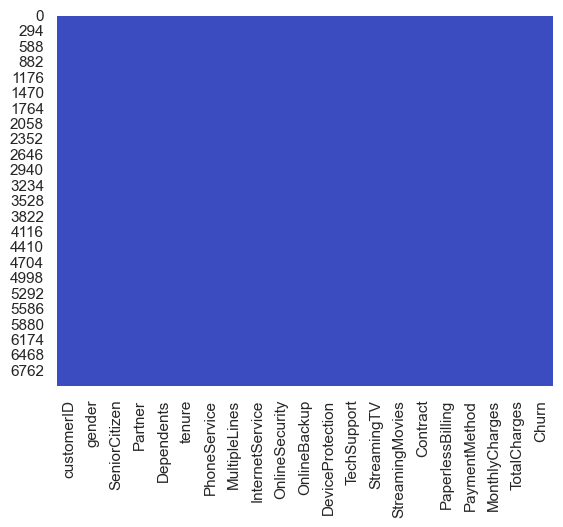

In [6]:
sns.heatmap(data.isnull(), cmap='coolwarm', cbar= False)

In [7]:
print("***********************************")
print("Rows\t\tMissing Values")
print("***********************************")
print(data.isnull().sum())
print("***********************************")
print(data.isnull().sum().sum())

***********************************
Rows		Missing Values
***********************************
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
***********************************
0


In [8]:
# Here we don't have any missing value

In [9]:
print("***********************************")
print("Rows\t\tData Type")
print("***********************************")
print(data.dtypes)
print("***********************************")

***********************************
Rows		Data Type
***********************************
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
***********************************


In [10]:
# Here we can see that we have lots of items having data types "Object"

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75


In [12]:
data.TotalCharges.value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [13]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", np.nan)

In [14]:
data['TotalCharges'].isnull().sum()/len(data)*100

0.1561834445548772

In [15]:
data.TotalCharges.value_counts()

TotalCharges
20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6530, dtype: int64

In [16]:
data = data[data['TotalCharges'].notnull()]
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
data.shape

(7032, 21)

In [18]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [20]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [21]:
data = data.drop('customerID', axis=1)

In [22]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = data.copy(deep=True)

text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features:
    df1[i] = le.fit_transform(df1[i])
    print(i, ' : ', df1[i].unique(), ' = ', le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [24]:
df1['gender'].value_counts()

gender
1    3549
0    3483
Name: count, dtype: int64

In [25]:
df1['Partner'].value_counts()

Partner
0    3639
1    3393
Name: count, dtype: int64

In [26]:
data.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [27]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7032.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
SeniorCitizen,7032.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
Partner,7032.00,0.48,0.50,0.00,0.00,0.00,1.00,1.00
Dependents,7032.00,0.30,0.46,0.00,0.00,0.00,1.00,1.00
tenure,7032.00,32.42,24.55,1.00,9.00,29.00,55.00,72.00
PhoneService,7032.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
MultipleLines,7032.00,0.94,0.95,0.00,0.00,1.00,2.00,2.00
InternetService,7032.00,0.87,0.74,0.00,0.00,1.00,1.00,2.00
OnlineSecurity,7032.00,0.79,0.86,0.00,0.00,1.00,2.00,2.00
OnlineBackup,7032.00,0.91,0.88,0.00,0.00,1.00,2.00,2.00


In [28]:
df1['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

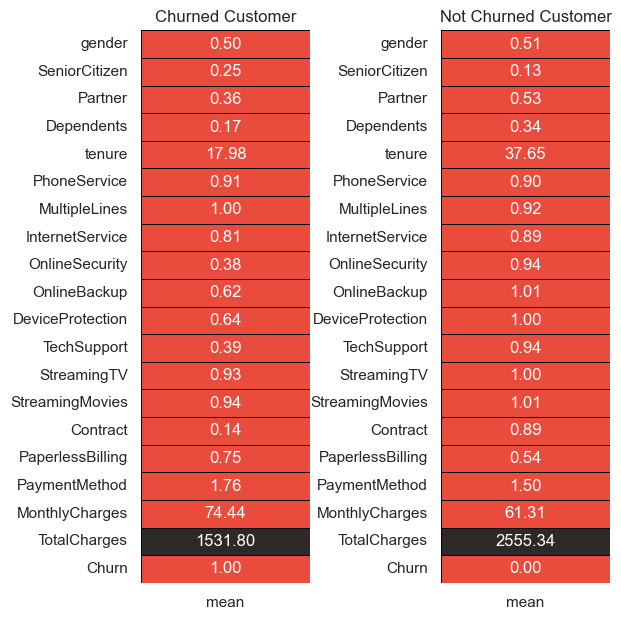

In [29]:
colors = ['#E94B3C', '#2D2926']

churn = df1[df1['Churn']==1].describe().T
not_churn = df1[df1['Churn']==0].describe().T

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6,6))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor = 'black',
            cbar=False, fmt='.2f')

plt.title('Churned Customer')

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor = 'black',
            cbar=False, fmt='.2f')
plt.title('Not Churned Customer')

fig.tight_layout(pad=0)

# EDA

In [30]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.00,7032.00,7032.00,7032.00
mean,0.16,32.42,64.80,2283.30
std,0.37,24.55,30.09,2266.77
min,0.00,1.00,18.25,18.80
25%,0.00,9.00,35.59,401.45
50%,0.00,29.00,70.35,1397.47
75%,0.00,55.00,89.86,3794.74
max,1.00,72.00,118.75,8684.80


In [32]:
data['TotalCharges'].nunique()

6530

In [33]:
col = list(df1.columns)
categorical_features = []
numerical_features = []

for i in col:
    if len(data[i].unique()) >6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)
print('categorical_features :', *categorical_features)
print()
print("numerical_features :", *numerical_features)

categorical_features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn

numerical_features : tenure MonthlyCharges TotalCharges


In [34]:
list(df1.columns)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [35]:
df1.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

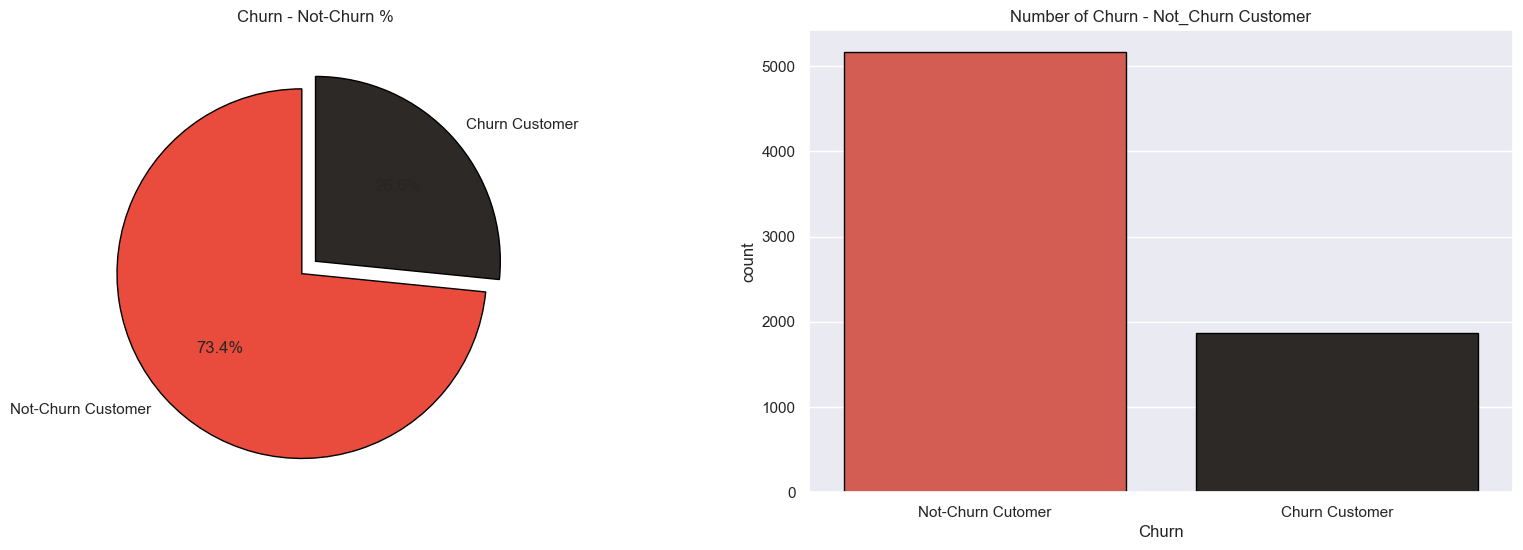

In [36]:
l = list(df1['Churn'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
plt.subplot(1,2,1)
plt.pie(circle, labels = ['Not-Churn Customer', 'Churn Customer'], autopct = '%1.1f%%', startangle=90,
        explode = (0.1,0), colors = colors, wedgeprops  = {'edgecolor' : 'black', 
                                                           'linewidth':1, 'antialiased' : True})
plt.title('Churn - Not-Churn %');

plt.subplot(1,2,2)

ax = sns.countplot(x='Churn', data = data, palette = colors, edgecolor = 'black')

# for rect in ax.patches:
#     ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
#             horizontalalignment = 'center', fontsize=11)
ax.set_xticklabels(['Not-Churn Cutomer', 'Churn Customer'])

plt.title('Number of Churn - Not_Churn Customer');
plt.show()    

In [37]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [38]:
# gender, SeniorCitizen, Partner, Dependents

In [39]:
# Case 1 : Customer information
# Case 2 : Payment information 
# Case 3 : Service Subscribed

In [41]:
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [42]:
categorical_features.remove('Churn')

In [43]:
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [44]:
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [45]:
l1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
l2 = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
      'OnlineBackup',  'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']
l3 = ['Contract',  'PaperlessBilling',  'PaymentMethod']

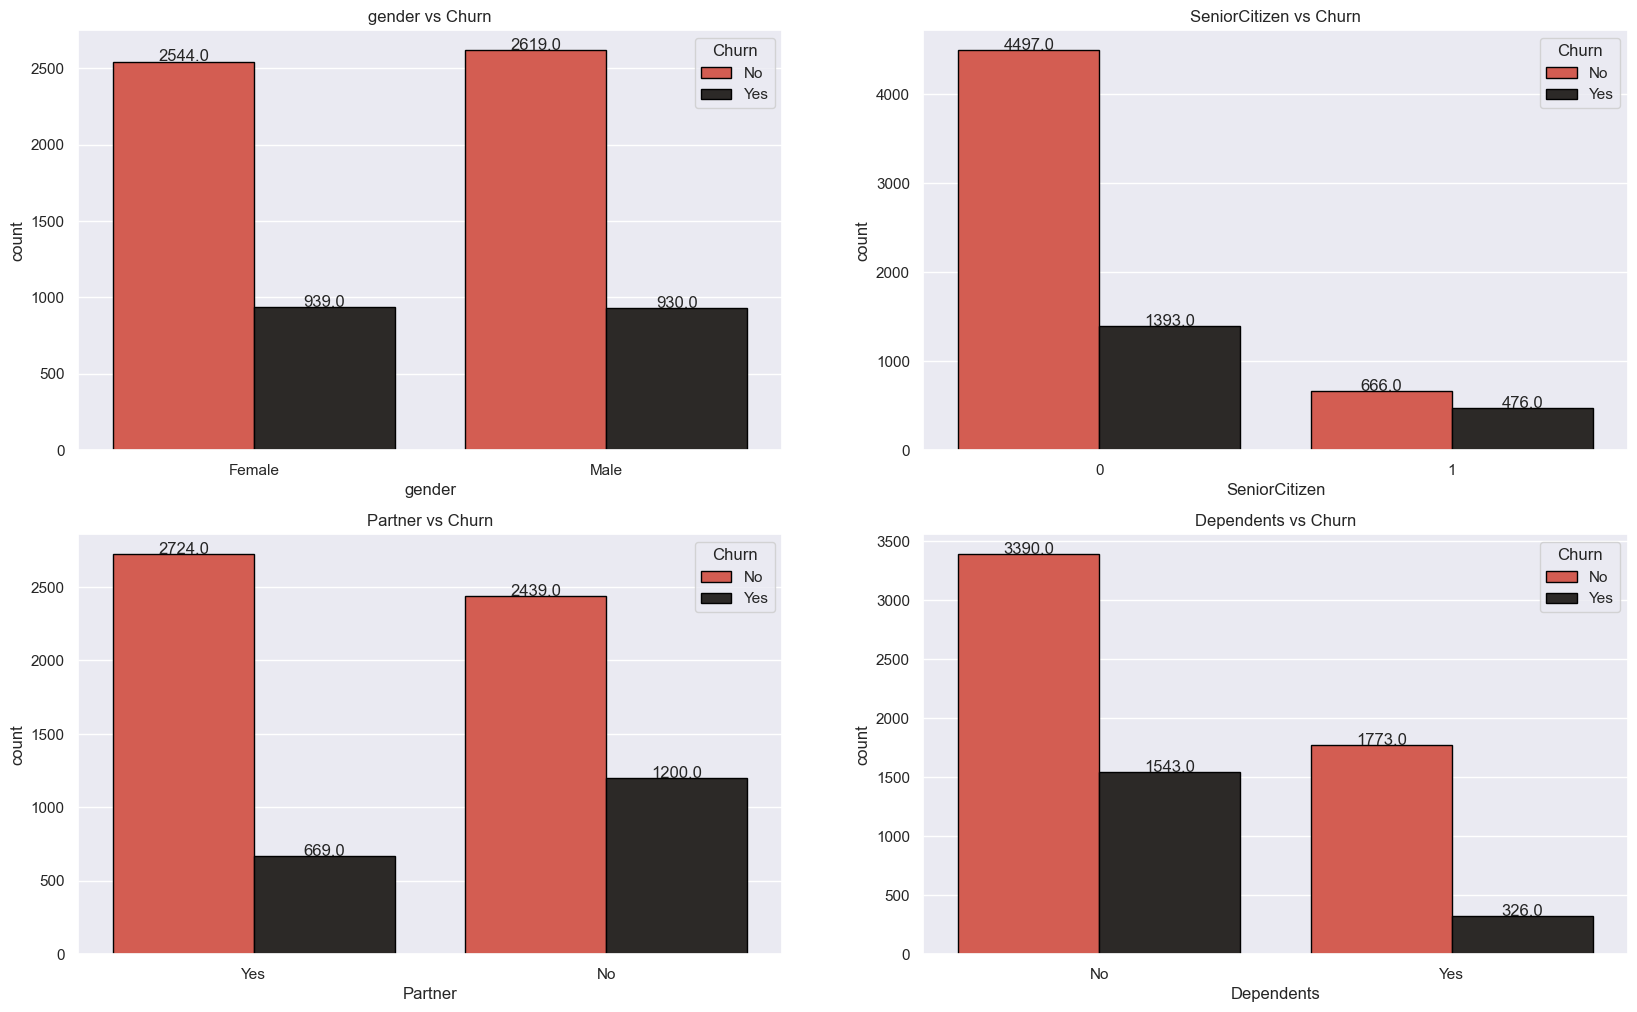

In [52]:
fig  = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=l1[i], data=data, hue='Churn', palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center')
        title = l1[i] + ' vs Churn'
        plt.title(title);

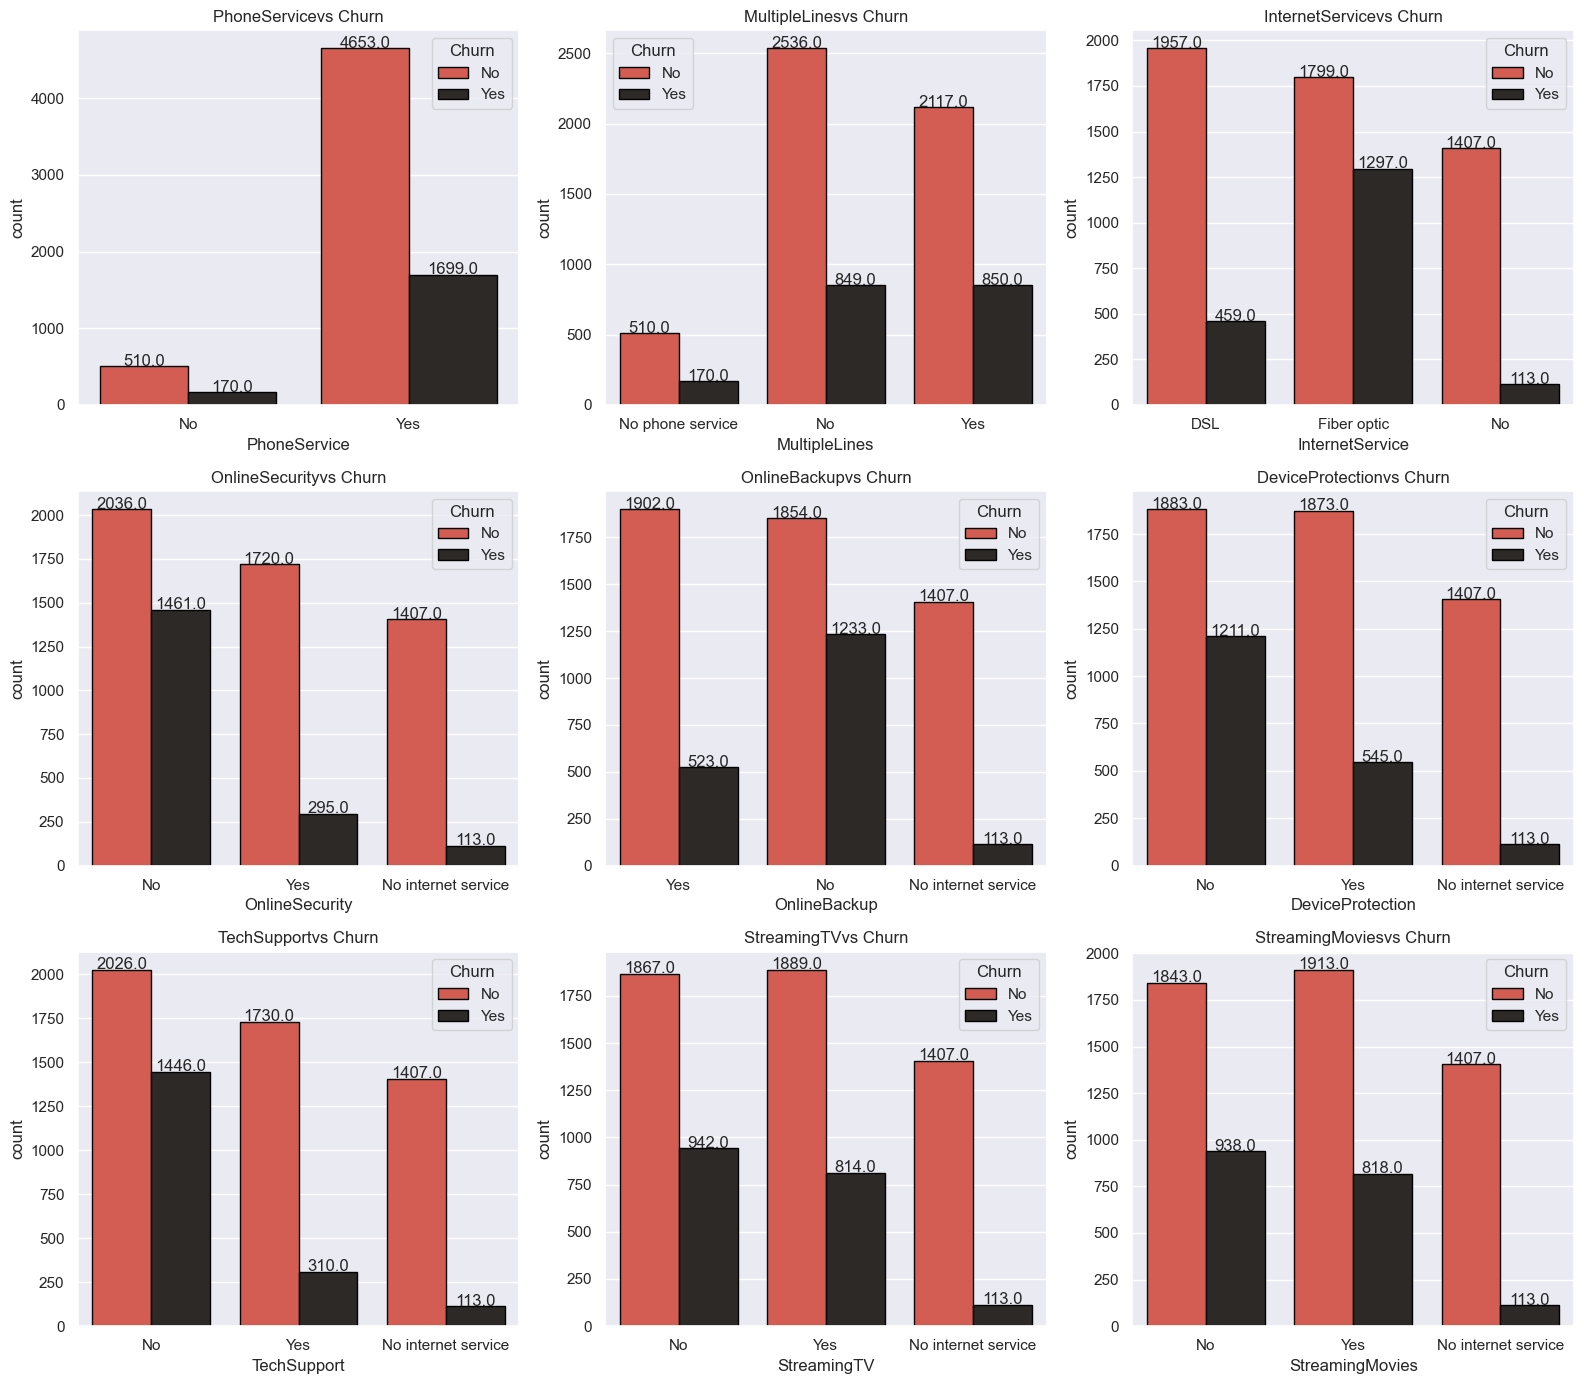

In [53]:
fig  = plt.subplots(nrows=2, ncols=2, figsize=(16,14))
for i in range(len(l2)):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(x=l2[i], data=data, hue='Churn', palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center')
        title = l2[i] + 'vs Churn'
        plt.title(title)
        plt.tight_layout();

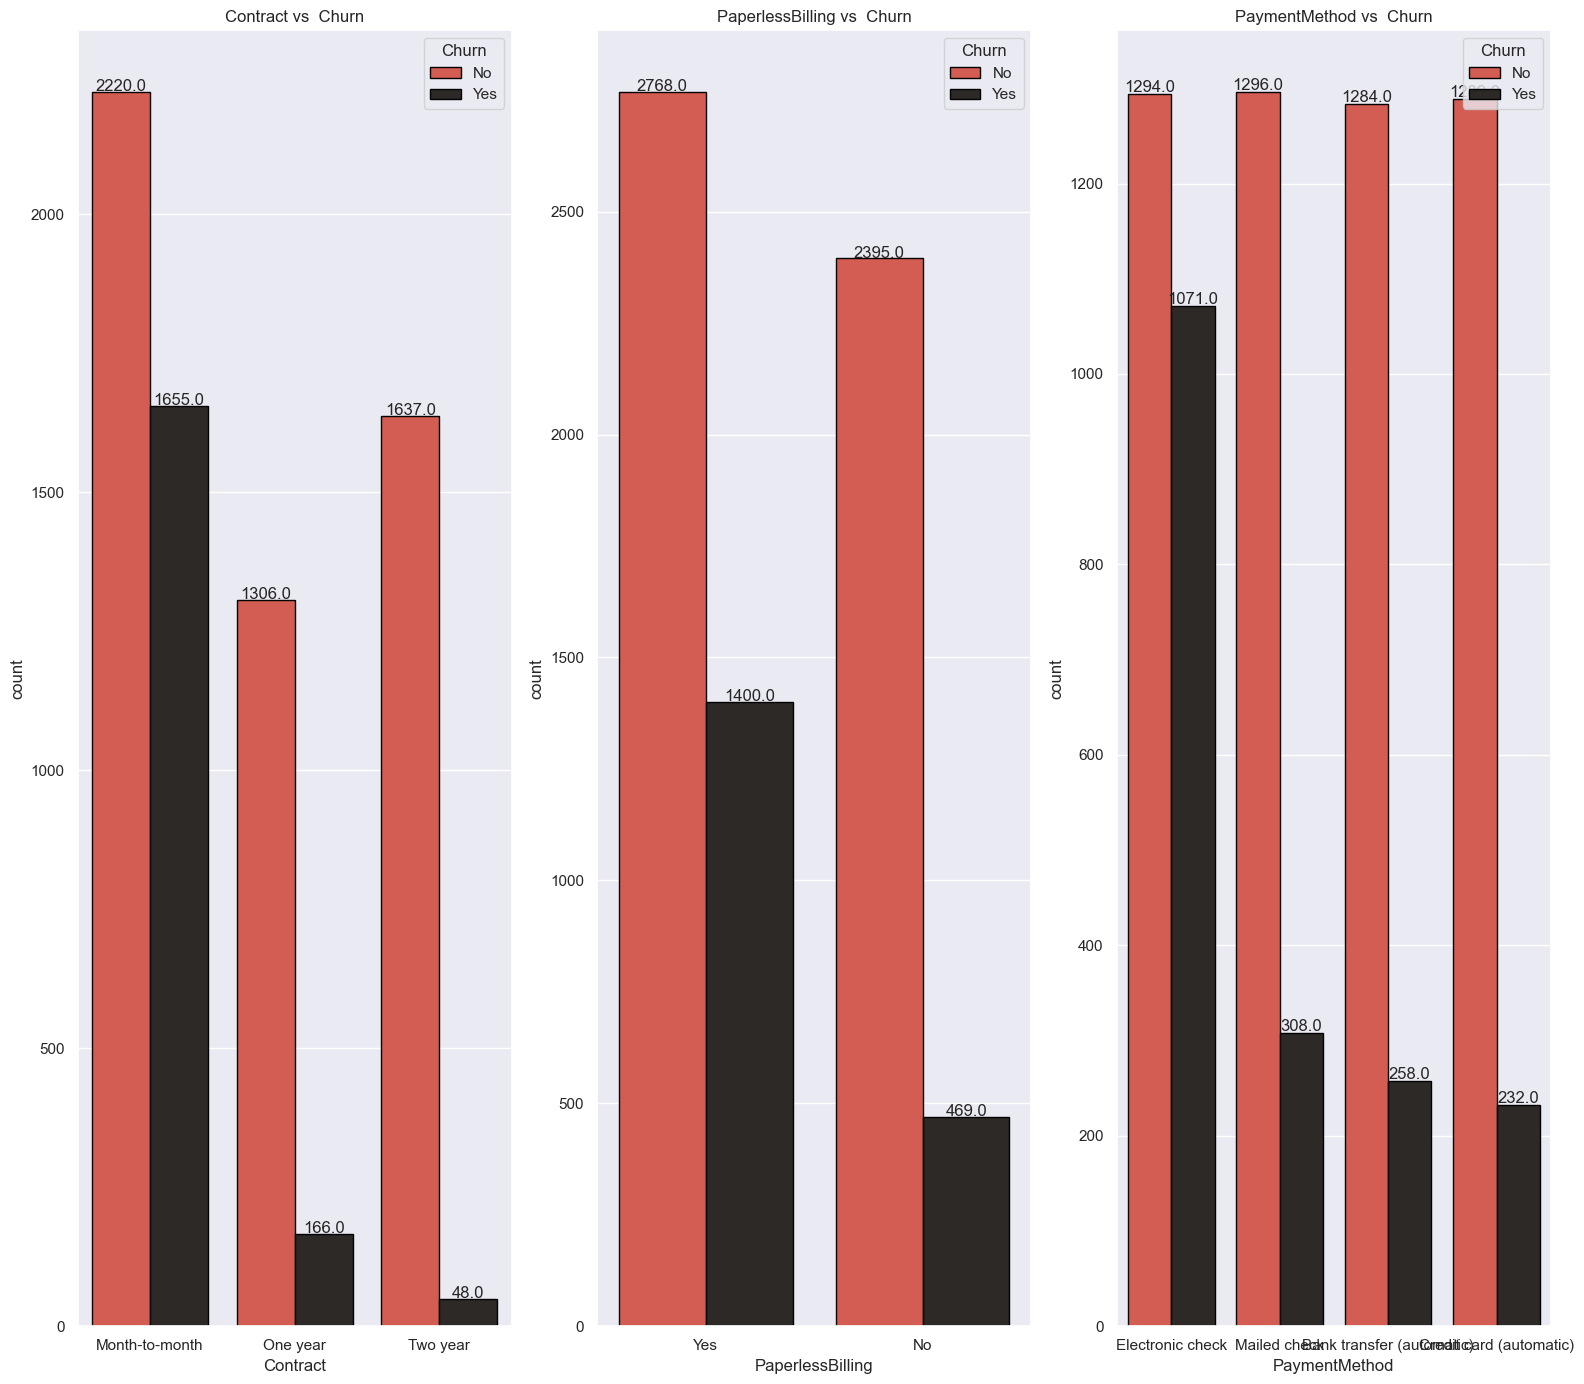

In [54]:
fig  = plt.subplots(nrows=2, ncols=2, figsize=(16,14))
for i in range(len(l3)):
    plt.subplot(1,3,i+1)
    ax = sns.countplot(x=l3[i], data=data, hue='Churn', palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center')
        title = l3[i] + ' vs  Churn'
        plt.title(title)
        plt.tight_layout();

In [55]:
data['PhoneService'].value_counts()

PhoneService
Yes    6352
No      680
Name: count, dtype: int64